In [1]:
import numpy as np
import scipy.sparse as ssp
import matplotlib.pyplot as plt
import scipy.sparse as ssp
import scipy.sparse.linalg as sspl


In [2]:
Nx = 20 #number of nodes in the x direction
Ny = 20 #number of nodes in the y direction
N = Nx*Ny #number of nodes
A = ssp.lil_array((N,N), dtype=np.int32) #adjacency matrix, in lil sparse format

In [3]:
#Helper functions

def get_east_neighbor(node):
    return (node//Nx)*Nx + (node+1)%Nx
def get_north_neighbor(node):
    return (node+Nx)%N
def add_edge_to_A(nodei,nodej,A):
    A[nodei,nodej] = 1
    A[nodej,nodei] = 1

In [4]:
for i in range(N):
    add_edge_to_A(i,get_east_neighbor(i),A)
    add_edge_to_A(i,get_north_neighbor(i),A)

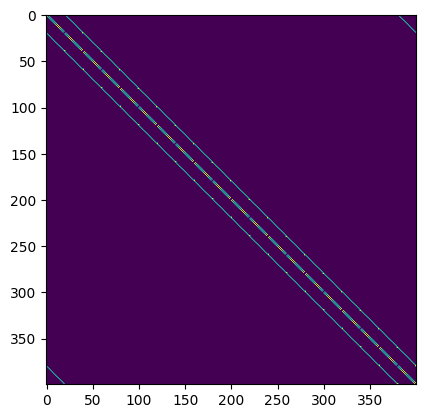

In [5]:
plt.imshow(A.todense())

In [6]:
u = np.zeros(N)
u[N-Nx:N] = 1
# Reshape u into a 20x20 matrix
u_matrix = u.reshape(Nx, Ny)

# Print the matrix
print(u_matrix)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
Ac = A.tocsr()
L = ssp.dia_array(((np.sum(Ac, axis=0)),(0)), shape=(N,N))-Ac
Ntop = N-Nx
Nbot = Nx
rhs = -L[Nbot:Ntop,Ntop:N]@u[Ntop:N]
x = sspl.spsolve(L[Nbot:Ntop,Nbot:Ntop], rhs )
u[Nbot:Ntop] = x[:]

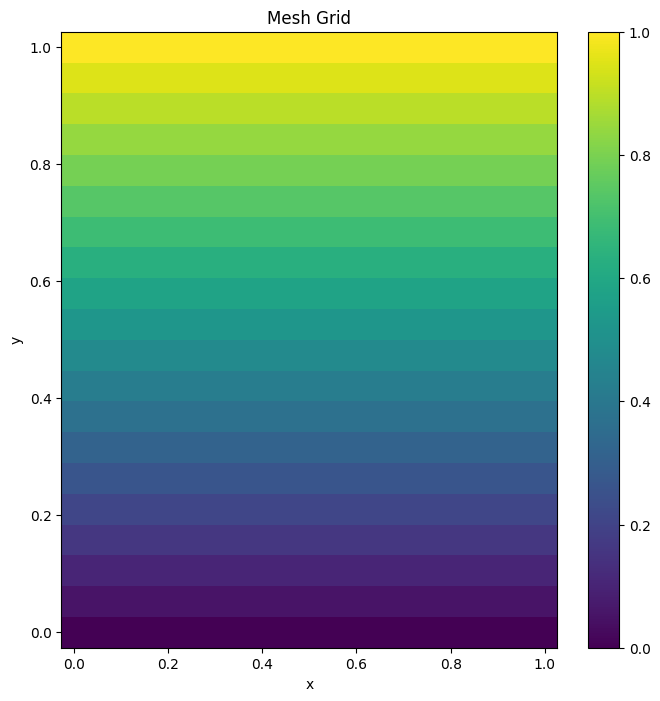

In [8]:
# Create a mesh grid
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# Plot the mesh grid
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, u.reshape(Nx, Ny), cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mesh Grid')
plt.show()

In [9]:
edgelist = []
for i in range(N):
    neighbors = A.rows[i]
    for j in neighbors:
        if i<j:
            edgelist.append([i,j])
forces = []
for e in edgelist:
    forces.append(u[e[1]]-u[e[0]])
    print('forces:', forces)
fb = L[0:Nbot,0:Nbot]@u[0:Nbot] + L[0:Nbot,Nbot:Ntop]@u[Nbot:Ntop] + L[0:Nbot,Ntop:N]@u[Ntop:N]
ft = L[Ntop:N,0:Nbot]@u[0:Nbot] + L[Ntop:N,Nbot:Ntop]@u[Nbot:Ntop] + L[Ntop:N,Ntop:N]@u[Ntop:N]
# Calculate total top force
totalft_force = sum(ft)
print('Total Top Force:' , totalft_force)
# Calculate total bottom force
totalfb_force = sum(fb)
print('Total Bottom Force:' , totalfb_force)
# Calculate global force F
total_force = sum(forces)
print('Total Force:', total_force)


forces: [0.0]
forces: [0.0, 0.0]
forces: [0.0, 0.0, 0.05263157894736807]
forces: [0.0, 0.0, 0.05263157894736807, 1.0]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807]
forces: [0.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0, 0.0, 0.05263157894736807, 1.0]
forces: [0.0

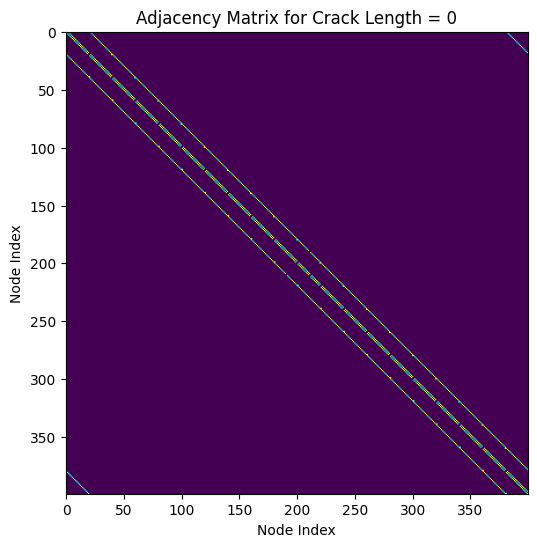

Crack Length = 0:
Affected Nodes: [190, 210, 211]
Affected Edges: [(210, 190), (210, 211)]

Row-wise Forces (Crack Length = 0):
Row 1: Sum = 21.05263157894736
Row 2: Sum = 1.0526315789473615
Row 3: Sum = 1.0526315789473617
Row 4: Sum = 1.0526315789473617
Row 5: Sum = 1.0526315789473628
Row 6: Sum = 1.0526315789473628
Row 7: Sum = 1.0526315789473633
Row 8: Sum = 1.0526315789473633
Row 9: Sum = 1.052631578947366
Row 10: Sum = 0.9999999999999971
Row 11: Sum = 1.0526315789473675
Row 12: Sum = 1.0526315789473684
Row 13: Sum = 1.0526315789473708
Row 14: Sum = 1.0526315789473717
Row 15: Sum = 1.052631578947374
Row 16: Sum = 1.0526315789473764
Row 17: Sum = 1.0526315789473768
Row 18: Sum = 1.052631578947382
Row 19: Sum = 1.0526315789473852
Row 20: Sum = 0.0



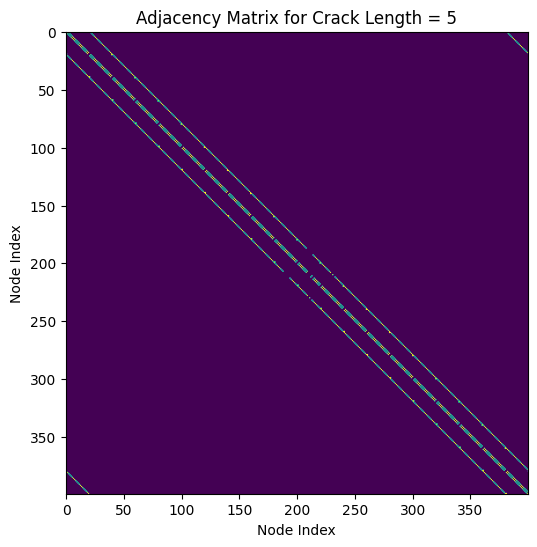

Crack Length = 5:
Affected Nodes: [188, 189, 191, 192, 208, 209, 210, 211, 212, 213, 229, 231]
Affected Edges: [(208, 188), (208, 209), (209, 189), (209, 229), (210, 209), (211, 191), (211, 231), (212, 192), (212, 213)]

Row-wise Forces (Crack Length = 5):
Row 1: Sum = 21.05263157894736
Row 2: Sum = 1.0526315789473615
Row 3: Sum = 1.0526315789473617
Row 4: Sum = 1.0526315789473617
Row 5: Sum = 1.0526315789473628
Row 6: Sum = 1.0526315789473628
Row 7: Sum = 1.0526315789473633
Row 8: Sum = 1.0526315789473633
Row 9: Sum = 1.052631578947366
Row 10: Sum = 0.7894736842105239
Row 11: Sum = 0.9473684210526301
Row 12: Sum = 1.0526315789473684
Row 13: Sum = 1.0526315789473708
Row 14: Sum = 1.0526315789473717
Row 15: Sum = 1.052631578947374
Row 16: Sum = 1.0526315789473764
Row 17: Sum = 1.0526315789473768
Row 18: Sum = 1.052631578947382
Row 19: Sum = 1.0526315789473852
Row 20: Sum = 0.0



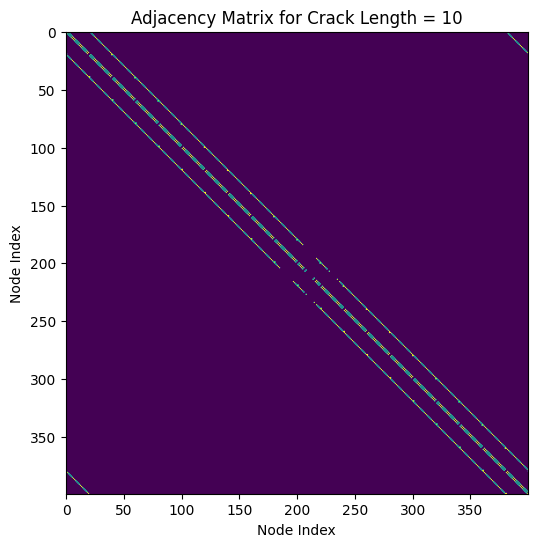

Crack Length = 10:
Affected Nodes: [185, 186, 187, 193, 194, 195, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 226, 228, 230, 232, 233, 235]
Affected Edges: [(205, 185), (205, 206), (206, 186), (206, 226), (207, 187), (207, 208), (208, 228), (210, 230), (211, 212), (212, 232), (213, 193), (213, 233), (214, 194), (214, 215), (215, 195), (215, 235)]

Row-wise Forces (Crack Length = 10):
Row 1: Sum = 21.05263157894736
Row 2: Sum = 1.0526315789473615
Row 3: Sum = 1.0526315789473617
Row 4: Sum = 1.0526315789473617
Row 5: Sum = 1.0526315789473628
Row 6: Sum = 1.0526315789473628
Row 7: Sum = 1.0526315789473633
Row 8: Sum = 1.0526315789473633
Row 9: Sum = 1.052631578947366
Row 10: Sum = 0.4736842105263145
Row 11: Sum = 0.6315789473684198
Row 12: Sum = 1.0526315789473684
Row 13: Sum = 1.0526315789473708
Row 14: Sum = 1.0526315789473717
Row 15: Sum = 1.052631578947374
Row 16: Sum = 1.0526315789473764
Row 17: Sum = 1.0526315789473768
Row 18: Sum = 1.052631578947382
Row 19: Sum = 1.0526315789

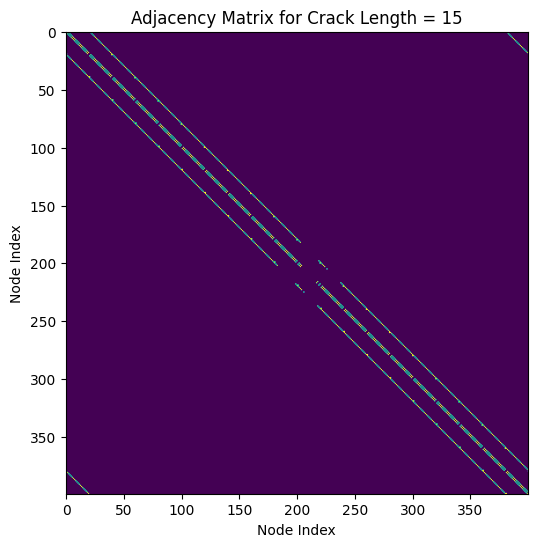

Crack Length = 15:
Affected Nodes: [183, 184, 196, 197, 203, 204, 205, 206, 207, 213, 214, 215, 216, 217, 218, 224, 227, 234, 236]
Affected Edges: [(203, 183), (203, 204), (204, 184), (204, 224), (205, 204), (206, 207), (207, 227), (213, 214), (214, 234), (215, 216), (216, 196), (216, 236), (217, 197), (217, 218)]

Row-wise Forces (Crack Length = 15):
Row 1: Sum = 21.05263157894736
Row 2: Sum = 1.0526315789473615
Row 3: Sum = 1.0526315789473617
Row 4: Sum = 1.0526315789473617
Row 5: Sum = 1.0526315789473628
Row 6: Sum = 1.0526315789473628
Row 7: Sum = 1.0526315789473633
Row 8: Sum = 1.0526315789473633
Row 9: Sum = 1.052631578947366
Row 10: Sum = 0.26315789473684154
Row 11: Sum = 0.4210526315789468
Row 12: Sum = 1.0526315789473684
Row 13: Sum = 1.0526315789473708
Row 14: Sum = 1.0526315789473717
Row 15: Sum = 1.052631578947374
Row 16: Sum = 1.0526315789473764
Row 17: Sum = 1.0526315789473768
Row 18: Sum = 1.052631578947382
Row 19: Sum = 1.0526315789473852
Row 20: Sum = 0.0



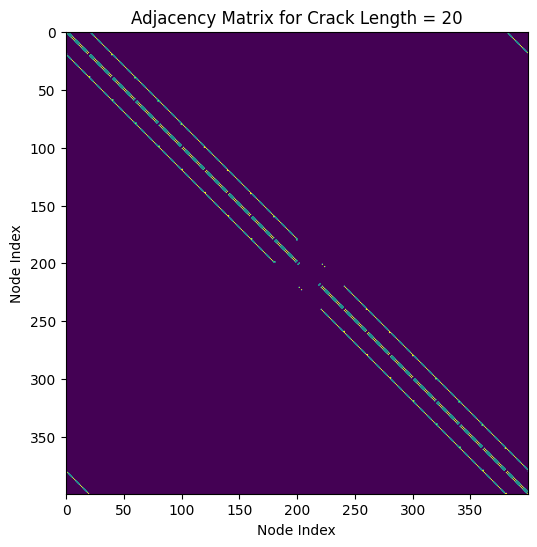

Crack Length = 20:
Affected Nodes: [180, 181, 182, 198, 199, 200, 201, 202, 203, 205, 216, 217, 218, 219, 220, 222, 225, 237, 238, 239]
Affected Edges: [(200, 180), (200, 219), (201, 181), (201, 202), (202, 182), (202, 222), (203, 202), (205, 225), (216, 217), (217, 237), (218, 198), (218, 238), (219, 199), (219, 239), (220, 200), (220, 239)]

Row-wise Forces (Crack Length = 20):
Row 1: Sum = 21.05263157894736
Row 2: Sum = 1.0526315789473615
Row 3: Sum = 1.0526315789473617
Row 4: Sum = 1.0526315789473617
Row 5: Sum = 1.0526315789473628
Row 6: Sum = 1.0526315789473628
Row 7: Sum = 1.0526315789473633
Row 8: Sum = 1.0526315789473633
Row 9: Sum = 1.052631578947366
Row 10: Sum = 2.220446049250313e-16
Row 11: Sum = 0.10526315789473673
Row 12: Sum = 1.0526315789473684
Row 13: Sum = 1.0526315789473708
Row 14: Sum = 1.0526315789473717
Row 15: Sum = 1.052631578947374
Row 16: Sum = 1.0526315789473764
Row 17: Sum = 1.0526315789473768
Row 18: Sum = 1.052631578947382
Row 19: Sum = 1.0526315789473852

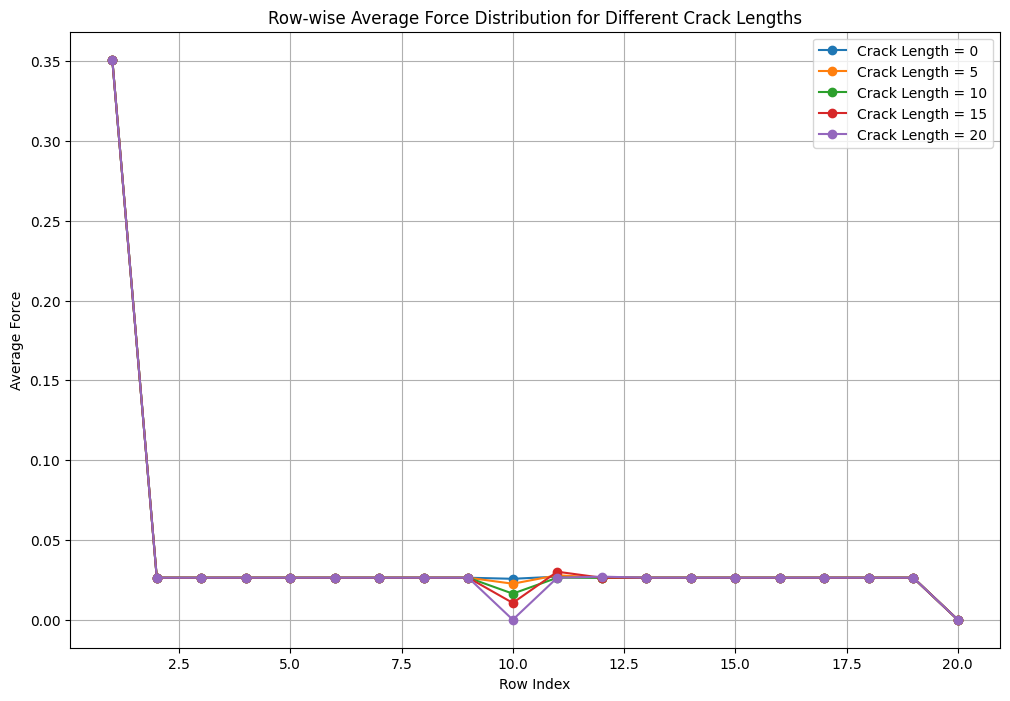

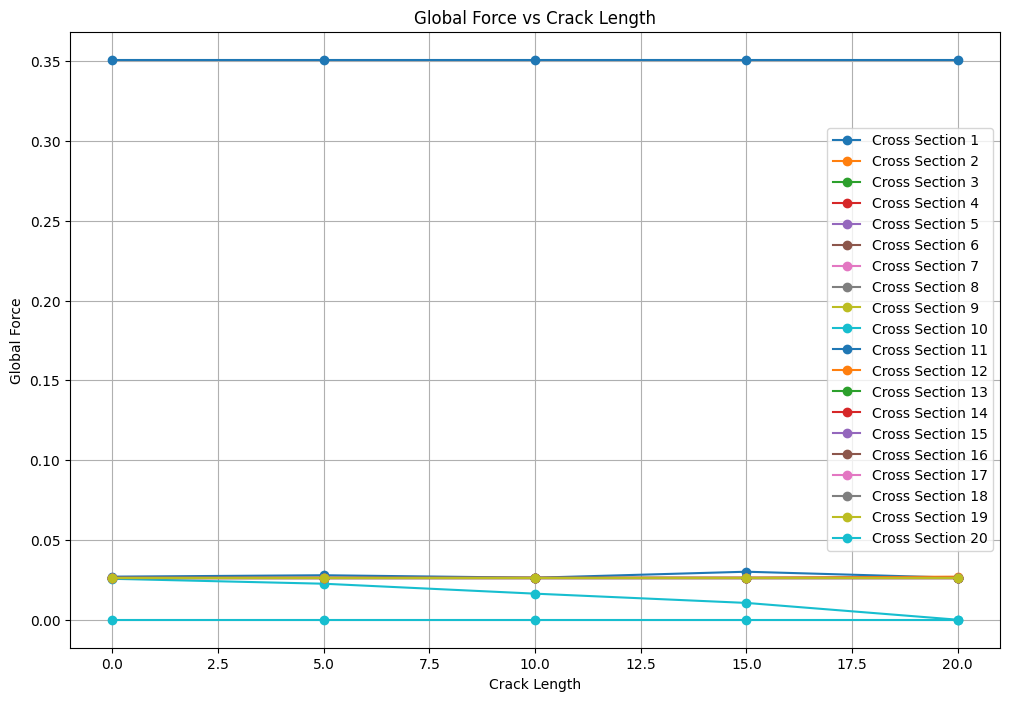

In [10]:

# Parameters for studying the crack length dependence on global force F
crack_lengths = [0, 5, 10, 15, 20]  # Define the crack lengths you want to study

# List to store the row-wise forces for each crack length
row_forces = []

# Loop through each crack length
for g in crack_lengths:
    # Calculate the center positions for the crack
    crack_center_y_study = Ny // 2
    crack_center_x_study = Nx // 2

    # Determine the start and end positions for the crack
    crack_start_x_study = crack_center_x_study - (g // 2)
    crack_end_x_study = crack_center_x_study + (g // 2)

    # Generate the crack nodes
    crack_nodes_study = [(crack_center_y_study * Nx) + i for i in range(crack_start_x_study, crack_end_x_study + 1)]

    # Apply the crack to the matrix A and record affected nodes and edges
    affected_nodes = set()
    affected_edges = []

    for node_study in crack_nodes_study:
        if node_study >= Nx:
            # Remove edges related to the crack
            neighbors_study = A.rows[node_study]
            for neighbor_study in neighbors_study:
                A[node_study, neighbor_study] = 0
                A[neighbor_study, node_study] = 0
                affected_nodes.add(node_study)
                affected_nodes.add(neighbor_study)
                affected_edges.append((node_study, neighbor_study))
    
    # Plot the adjacency matrix for the current crack length
    plt.figure(figsize=(6, 6))
    plt.imshow(A.todense())
    plt.title(f'Adjacency Matrix for Crack Length = {g}')
    plt.xlabel('Node Index')
    plt.ylabel('Node Index')
    plt.show()
    

    # Calculate forces as before
    edgelist_study = []
    for i in range(N):
        neighbors_study = A.rows[i]
        for j in neighbors_study:
            if i < j:
                edgelist_study.append([i, j])

    # Initialize row-wise forces
    row_forces_study = [[] for _ in range(Ny)]  # List to store forces for each row

    # Calculate forces for each edge and assign to respective rows
    for e in edgelist_study:
        row_i = e[0] // Nx  # Determine the row index for node e[0]
        row_forces_study[row_i].append(u[e[1]] - u[e[0]])  # Add force difference to the respective row

    # Append row-wise forces to the list
    row_forces.append(row_forces_study)

    # Print crack details
    print(f"Crack Length = {g}:")
    print(f"Affected Nodes: {sorted(affected_nodes)}")
    print(f"Affected Edges: {affected_edges}")
    print()

    # Print row-wise forces and sum for the current crack length
    print(f"Row-wise Forces (Crack Length = {g}):")
    for row_idx, forces in enumerate(row_forces_study):
        row_sum = np.sum(forces)
        print(f"Row {row_idx + 1}: Sum = {row_sum}") #, Forces = {forces}

    print()  # Print an empty line for separation



# Plotting row-wise forces for each crack length
plt.figure(figsize=(12, 8))

for i, g in enumerate(crack_lengths):
    mean_forces = [np.mean(row) for row in row_forces[i]]
    plt.plot(range(1, Ny + 1), mean_forces, marker='o', label=f'Crack Length = {g}')

plt.xlabel('Row Index')
plt.ylabel('Average Force')
plt.title('Row-wise Average Force Distribution for Different Crack Lengths')
plt.legend()
plt.grid(True)
plt.show()


# Initialize lists to store average forces per row across crack lengths
avg_forces_per_row = [[] for _ in range(Ny)]

# Calculate average forces per row across different crack lengths
for forces_study in row_forces:
    for row_idx, forces in enumerate(forces_study):
        avg_force = np.mean(forces) if forces else 0  # Calculate average force for the row
        avg_forces_per_row[row_idx].append(avg_force)  # Append to the corresponding row list

# Plotting row-wise average forces across crack lengths
plt.figure(figsize=(12, 8))

for row_idx, avg_forces in enumerate(avg_forces_per_row):
    plt.plot(crack_lengths, avg_forces, marker='o', label=f'Cross Section {row_idx + 1}')

plt.xlabel('Crack Length')
plt.ylabel('Global Force')
plt.title('Global Force vs Crack Length')
plt.legend()
plt.grid(True)
plt.show()


Crack Center (y-coordinate): 10
Crack Nodes: [210]
Horizontal Edge: (0, 1), Force: 0.0
Horizontal Edge: (1, 2), Force: 0.0
Horizontal Edge: (2, 3), Force: 0.0
Horizontal Edge: (3, 4), Force: 0.0
Horizontal Edge: (4, 5), Force: 0.0
Horizontal Edge: (5, 6), Force: 0.0
Horizontal Edge: (6, 7), Force: 0.0
Horizontal Edge: (7, 8), Force: 0.0
Horizontal Edge: (8, 9), Force: 0.0
Horizontal Edge: (9, 10), Force: 0.0
Horizontal Edge: (10, 11), Force: 0.0
Horizontal Edge: (11, 12), Force: 0.0
Horizontal Edge: (12, 13), Force: 0.0
Horizontal Edge: (13, 14), Force: 0.0
Horizontal Edge: (14, 15), Force: 0.0
Horizontal Edge: (15, 16), Force: 0.0
Horizontal Edge: (16, 17), Force: 0.0
Horizontal Edge: (17, 18), Force: 0.0
Horizontal Edge: (18, 19), Force: 0.0
Horizontal Edge: (19, 0), Force: 0.0
Horizontal Edge: (20, 21), Force: 0.0
Horizontal Edge: (21, 22), Force: 0.0
Horizontal Edge: (22, 23), Force: 0.0
Horizontal Edge: (23, 24), Force: -1.3877787807814457e-17
Horizontal Edge: (24, 25), Force: -6.

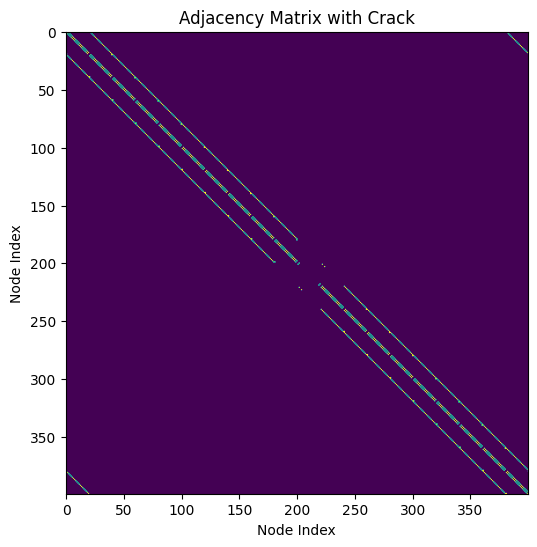

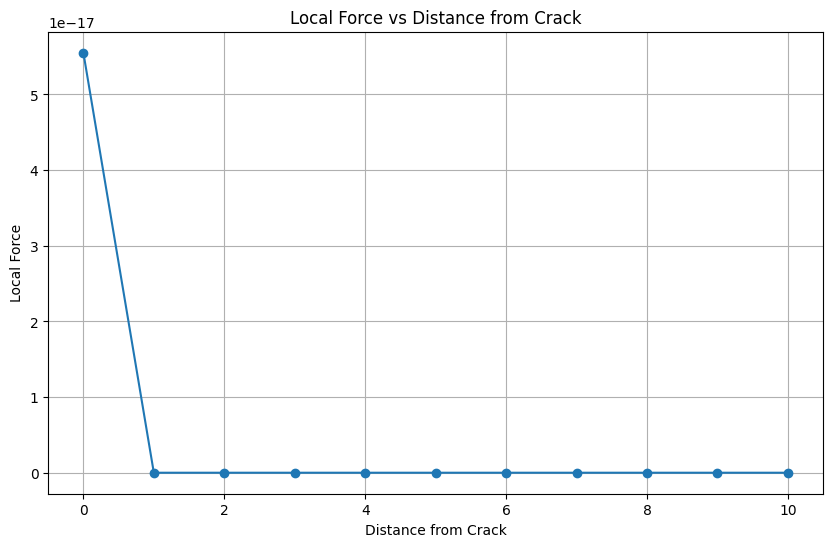

In [11]:
from collections import defaultdict

# Manually fix the crack length
crack_length = 0  # Change this value to set the crack length



crack_center_y = Ny // 2
crack_start_x = Nx // 2 - crack_length // 2
crack_end_x = Nx // 2 + crack_length // 2

# Remove edges corresponding to the crack
crack_nodes = [(crack_center_y * Nx) + i for i in range(crack_start_x, crack_end_x + 1)]
for node in crack_nodes:
    if node >= Nx:
        neighbors = A.rows[node]
        for neighbor in neighbors:
            A[node, neighbor] = 0
            A[neighbor, node] = 0

print(f'Crack Center (y-coordinate): {crack_center_y}')
print(f'Crack Nodes: {crack_nodes}')

# Recalculate horizontal forces and distances from crack
horizontal_forces = []
for i in range(N):
    east_neighbor = get_east_neighbor(i)
    if A[i, east_neighbor] == 1:  # Check if the edge exists
        force = u[east_neighbor] - u[i]
        horizontal_forces.append((i, east_neighbor, force))
        print(f'Horizontal Edge: ({i}, {east_neighbor}), Force: {force}')

distances_from_crack = []
for edge in horizontal_forces:
    node1, node2, force = edge
    node1_y = node1 // Nx
    distance = abs(node1_y - crack_center_y)
    distances_from_crack.append((distance, force))

# Group forces by distance from crack and calculate averages
distance_force_map = defaultdict(list)
for distance, force in distances_from_crack:
    distance_force_map[distance].append(force)

avg_forces_by_distance = {distance: np.mean(forces) for distance, forces in distance_force_map.items()}

# Plotting the updated adjacency matrix
plt.figure(figsize=(6, 6))
plt.imshow(A.todense())
plt.title('Adjacency Matrix with Crack')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
distances = sorted(avg_forces_by_distance.keys())
avg_forces = [avg_forces_by_distance[d] for d in distances]
plt.plot(distances, avg_forces, marker='o')
plt.xlabel('Distance from Crack')
plt.ylabel('Local Force')
plt.title('Local Force vs Distance from Crack')
plt.grid(True)
plt.show()